<div style="text-align: center;">
    <h1>E-Ticarette Müşteri Segmentasyonu</h1>
</div>

### Veri Seti Bilgileri:

E-ticaret verilerinden elde edilen 8 farklı müşteri segmenti üzerinde çalışıyoruz. 🛒 Bu segmentler, demografik özellikler ve satın alma davranışları gibi çeşitli faktörlere dayanmaktadır. Veri setimiz, toplamda 5460 müşteriyi içermekte ve her müşteri, alışveriş sıklığı, harcama alışkanlıkları ve yaş gibi özelliklerle tanımlanmaktadır. 📊
Çalışmamızda, bu faktörleri analiz ederek müşteri segmentlerini belirlemeye odaklanıyoruz. 🎯 Amacımız, farklı müşteri gruplarını daha iyi anlamak ve her bir gruba özel pazarlama stratejileri geliştirmektir. 💡 Farklı makine öğrenmesi modellerini uygulayarak, en doğru segmentasyon sonuçlarına ulaşmayı hedefliyoruz. 🧠 Bu çalışmadan elde edilen bulgular, e-ticaret firmalarının pazarlama stratejilerini optimize etmelerine ve müşteri deneyimini iyileştirmelerine yardımcı olacak önemli ipuçları sunacaktır. 📈"

### Değişkenler:

- Cinsiyet
- Yaş Grubu
- Medeni Durum
- Eğitim Düzeyi
- İstihdam Durumu
- Yıllık Ortalama Gelir
- Yaşadığı Şehir
- En Çok İlgilendiği Ürün Grubu
- Yıllık Ortalama Satın Alım Miktarı
- Yıllık Ortalama Sipariş Verilen Ürün Adedi
- Eğitime Devam Etme Durumu
- Öbek İsmi
- Yıllık Ortalama Sepete Atılan Ürün Adedi

![apple]( https://www.aforsoft.com/Content/UpFiles/202007231700486102_musteri-segmentasyonu-nedir.jpg )

# 1. Bölüm: KEŞİFÇİ VERİ ANALİZİ
- Veri Seti Okuma
- Veri Seti Kolon İsimleri
- Veri Seti Kolon İsimlerini Değiştirme
- Veri Setinin Tanımlayıcı istatistiklerinin Transpozu alınmış hali
- Veri Seti Tanımlayıcı İstatistiklerinin Tablo Halinde Verilmesi
- Veri Setinin Genel Resmi
- Veri Setinde Numerik ve Kategorik Değişkenlerin  Yakalanması 
- Kategorik değişkenlerin incelenmesi
- Numeric Değişkenlerin İncelenmesi
- Hedef Değişken Analizi
- Korelasyon Analizi

# 2. Bölüm: ÖZELLİK MÜHENDİSLİĞİ
- Aykırı Değer Analizi
- Eksik Değerler
- Label Encoding
- Özellik Ölçeklendirme(Scale)

# 3. Bölüm: MODELLERİN KURULUMU VE BAŞARILARI

## 1. BÖLÜM
## 1. KEŞİFÇİ VERİ ANALİZİ

### Gerekli Kütüphaneler

In [119]:
import numpy as np# çok boyutlu dizileri ve matrixleri hızlı şekilde kullanma
import pandas as pd # dataframe işlemleri için

import random #sayı üretmek, rastgele seçimler yapmak 

#######veri görselleştirme#########
import matplotlib.pyplot as plt
import seaborn as sns

#######başarı metrikleri için kullanılan kütüphane#########
from math import sqrt
from sklearn.metrics import mean_squared_error,accuracy_score, precision_score, recall_score, f1_score,roc_auc_score

#Hiperparameter optimizasyonu kütüphanesi
from sklearn.model_selection import GridSearchCV, cross_validate

#veri setini train şekilde ayırmak için kullandığımız kütüphane
from sklearn.model_selection import train_test_split

#Label_Encoder_islemi
from sklearn.preprocessing import LabelEncoder

#verileri belirli bir ölçekte ayarlamak için kütüphane
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler


#Makine Öğrenmesi kütüphaneleri
import joblib #machine learning model kayıt.
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_validate
import numpy as np
from sklearn.model_selection import GridSearchCV

### 1.1. Veri Seti okutma

In [120]:
df=pd.read_csv("train.csv",index_col=[0])
df

,Cinsiyet,Yaş Grubu,Medeni Durum,Eğitim Düzeyi,İstihdam Durumu,Yıllık Ortalama Gelir,Yaşadığı Şehir,En Çok İlgilendiği Ürün Grubu,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Eğitime Devam Etme Durumu,Öbek İsmi,Yıllık Ortalama Sepete Atılan Ürün Adedi
index,,,,,,,,,,,,,
0,Kadın,31-40,Bekar,Yüksek Lisans Mezunu,Düzenli ve Ücretli Bir İşi Var,748266.440879,Büyük Şehir,Elektronik ve Teknolojik Ürünler,32010.900881,37.310644,Etmiyor,obek_4,102.936904
1,Erkek,>60,Evli,Lise Mezunu,Kendi İşinin Sahibi,246298.609605,Küçük Şehir,Spor Malzemeleri,4145.729891,11.554851,Etmiyor,obek_5,82.176053
2,Erkek,18-30,Bekar,Lise Mezunu,Düzenli ve Ücretli Bir İşi Var,268582.732360,Küçük Şehir,Giyim,9924.379414,55.353236,Ediyor,obek_8,141.661426
3,Erkek,51-60,Evli,Lise Mezunu,Kendi İşinin Sahibi,327721.837865,Kırsal,Giyim,6417.780714,15.417239,Etmiyor,obek_3,17.097397
4,Erkek,31-40,Evli,Ortaokul Mezunu,İşsiz veya Düzenli Bir İşi Yok,397431.626948,Büyük Şehir,Giyim,7886.663061,14.689837,Etmiyor,obek_3,20.470459
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5455,Kadın,>60,Bekar,Üniversite Mezunu,Emekli,478054.247819,Köy veya Kasaba,Kozmetik,43182.299801,31.356284,Etmiyor,obek_6,51.600436
5456,Erkek,51-60,Evli,Doktora Ötesi,Kendi İşinin Sahibi,481852.853651,Köy veya Kasaba,Ev ve Mobilya,42107.996193,26.288620,Etmiyor,obek_6,49.190536
5457,Kadın,51-60,Evli,İlkokul Mezunu,Düzenli ve Ücretli Bir İşi Var,309443.687351,Küçük Şehir,Ev ve Mobilya,4655.392445,5.156906,Etmiyor,obek_1,9.537384


### 1.2. Veri Seti Kolon İsimlerini Öğrenme

In [121]:
df.columns.to_list()#kolon isimleri

['Cinsiyet',
 'Yaş Grubu',
 'Medeni Durum',
 'Eğitim Düzeyi',
 'İstihdam Durumu',
 'Yıllık Ortalama Gelir',
 'Yaşadığı Şehir',
 'En Çok İlgilendiği Ürün Grubu',
 'Yıllık Ortalama Satın Alım Miktarı',
 'Yıllık Ortalama Sipariş Verilen Ürün Adedi',
 'Eğitime Devam Etme Durumu',
 'Öbek İsmi',
 'Yıllık Ortalama Sepete Atılan Ürün Adedi']

### 1.3. Veri Setinin Tanımlayıcı istatistiklerinin Transpozu alınmış hali

In [122]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Yıllık Ortalama Gelir,5460.0,363571.133428,219714.442407,43922.988693,215693.439307,286925.436073,468188.221798,1.192437e+06
Yıllık Ortalama Satın Alım Miktarı,5460.0,16616.612217,14099.171704,2859.254000,4931.859057,8426.818967,30579.244695,4.860559e+04
Yıllık Ortalama Sipariş Verilen Ürün Adedi,5460.0,24.040884,14.945655,0.000000,11.550502,20.095924,35.918161,6.461620e+01
Yıllık Ortalama Sepete Atılan Ürün Adedi,5460.0,73.445693,47.214184,3.977559,25.009168,82.485579,104.473291,2.423084e+02


### 1.4. Veri Setinin Genel Resmi

In [123]:


def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape) # satır sütun sayısı.
    print("##################### Types #####################")
    print(dataframe.dtypes) # değişkenleri veri tipi
    print("##################### Head #####################")
    print(dataframe.head(head)) # veri setinde ilk 5 değişken
    print("##################### Tail #####################")
    print(dataframe.tail(head))  #veri setinde son 5 satır
    print("##################### NA #####################")
    print(dataframe.isnull().sum()) # Değişkenlerin boş satır sayısı.
    print("##################### Quantiles #####################")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

check_df(df)

df.head()
df.info()

##################### Shape #####################
(5460, 13)
##################### Types #####################
Cinsiyet                                       object
Yaş Grubu                                      object
Medeni Durum                                   object
Eğitim Düzeyi                                  object
İstihdam Durumu                                object
Yıllık Ortalama Gelir                         float64
Yaşadığı Şehir                                 object
En Çok İlgilendiği Ürün Grubu                  object
Yıllık Ortalama Satın Alım Miktarı            float64
Yıllık Ortalama Sipariş Verilen Ürün Adedi    float64
Eğitime Devam Etme Durumu                      object
Öbek İsmi                                      object
Yıllık Ortalama Sepete Atılan Ürün Adedi      float64
dtype: object
##################### Head #####################
      Cinsiyet Yaş Grubu Medeni Durum         Eğitim Düzeyi  \
index                                                        

### 1.5. Veri Setinde Numerik ve Kategorik Değişkenlerin  Yakalanması 

In [124]:
##################################
# NUMERİK VE KATEGORİK DEĞİŞKENLERİN YAKALANMASI
##################################

#cat_th= bir numerik değişken ..'dan(aşağıdaki 10 olarak tanımladık örneğin) daha az eşsiz değere sahip ise buna kategorik değişken muamelesi yapıcak.
#car_th= bir kategorik değişken ..'dan aşağıdaki 20 olarak tanımladık örneğin)daha az eşsiz değere sahip ise buna numerik değişken muamelesi yapıcak.
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """

    Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.
    Not: Kategorik değişkenlerin içerisine numerik görünümlü kategorik değişkenler de dahildir.

    Parameters
    ------
        dataframe: dataframe
                Değişken isimleri alınmak istenilen dataframe
        cat_th: int, optional
                numerik fakat kategorik olan değişkenler için sınıf eşik değeri
        car_th: int, optional
                kategorik fakat kardinal değişkenler için sınıf eşik değeri

    Returns
    ------
        cat_cols: list
                Kategorik değişken listesi
        num_cols: list
                Numerik değişken listesi
        cat_but_car: list
                Kategorik görünümlü kardinal değişken listesi

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = toplam değişken sayısı
        num_but_cat cat_cols'un içerisinde.

    """
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car


cat_cols, num_cols, cat_but_car = grab_col_names(df)



Observations: 5460
Variables: 13
cat_cols: 9
num_cols: 4
cat_but_car: 0
num_but_cat: 0


Veri setinde 12 adet değişken bulunmaktadır. Bu değişkenler aşağıdaki gibidir:
- Öbek İsmi : Kategorik (Bağımlı Değişken)
- Cinsiyet: Kategorik
- Yaş Grubu: Kategorik Değişken
- Medeni Durum: Kategorik 
- Eğitim Düzeyi : Kategorik 
- İstihdam Durumu : Kategorik 
- Yıllık Ortalama Gelir : Sayısal 
- Yaşadığı Şehir : Kategorik 
- En Çok İlgilendiği Ürün Grubu : Kategorik 
- Yıllık Ortalama Satın Alım Miktarı : Sayısal 
- Yıllık Ortalama Sipariş Verilen Ürün Adedi : Sayısal 
- Eğitime Devam Etme Durumu : Kategorik 
- Yıllık Ortalama Sepete Atılan Ürün Adedi : Sayısal

Veri setinde 9 kategorik ve 4 sayısal değişken bulunmaktadır. Bağımlı değişkenimiz kategorik olduğu için modelimiz bir sınıflandırma problemi olarak ele alınmış ve bu doğrultuda uygun sınıflandırma modelleri seçilip geliştirilmiştir.

### 1.6. kategorik değişkenlerin incelenmesi

In [125]:
cat_cols

['Cinsiyet',
 'Yaş Grubu',
 'Medeni Durum',
 'Eğitim Düzeyi',
 'İstihdam Durumu',
 'Yaşadığı Şehir',
 'En Çok İlgilendiği Ürün Grubu',
 'Eğitime Devam Etme Durumu',
 'Öbek İsmi']

#### 1.6.1. kategorik değişkenlerin dağılımı

In [134]:
import pandas as pd
import matplotlib.pyplot as plt

# Kategorik değişkenleri pasta grafiği ile gösterme
def cat_summary_pie(dataframe, col_name, plot=True):
    summary_df = pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                               "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)})
    
    print(summary_df)
    print("##########################################")
    
    if plot:
        plt.figure(figsize=(4, 4))
        plt.pie(summary_df[col_name], labels=summary_df.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
        plt.title(f"{col_name} Dağılımı")
        plt.show()

       Cinsiyet      Ratio
Erkek      2964  54.285714
Kadın      2496  45.714286
##########################################


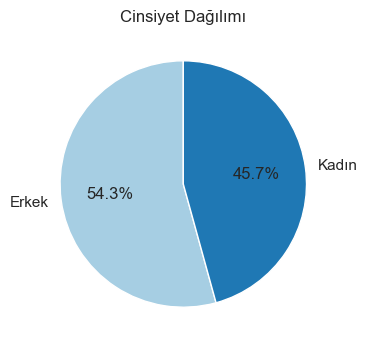

       Yaş Grubu      Ratio
18-30       1841  33.717949
31-40       1477  27.051282
51-60        861  15.769231
41-50        727  13.315018
>60          554  10.146520
##########################################


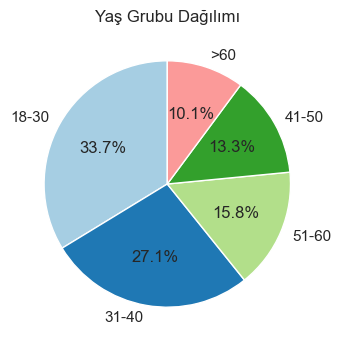

       Medeni Durum      Ratio
Evli           2834  51.904762
Bekar          2626  48.095238
##########################################


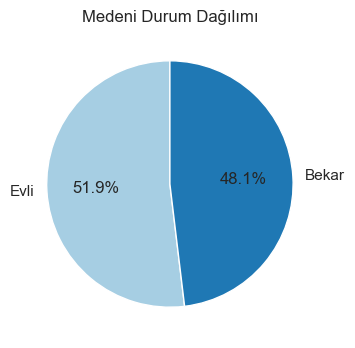

                      Eğitim Düzeyi      Ratio
Lise Mezunu                    1388  25.421245
Üniversite Mezunu              1257  23.021978
Yüksekokul Mezunu               588  10.769231
Yüksek Lisans Mezunu            545   9.981685
İlkokul Mezunu                  417   7.637363
Ortaokul Mezunu                 412   7.545788
Eğitimsiz                       381   6.978022
Doktora Mezunu                  263   4.816850
Doktora Ötesi                   209   3.827839
##########################################


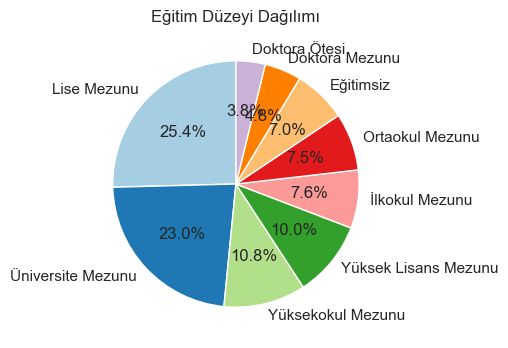

                                İstihdam Durumu      Ratio
Düzenli ve Ücretli Bir İşi Var             2768  50.695971
İşsiz veya Düzenli Bir İşi Yok             1349  24.706960
Kendi İşinin Sahibi                         879  16.098901
Emekli                                      464   8.498168
##########################################


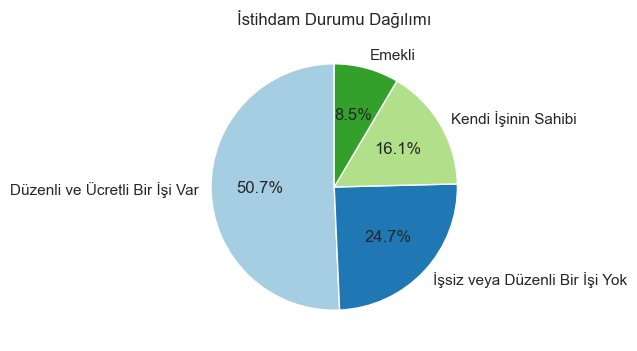

                 Yaşadığı Şehir      Ratio
Büyük Şehir                1959  35.879121
Küçük Şehir                1842  33.736264
Köy veya Kasaba            1092  20.000000
Kırsal                      567  10.384615
##########################################


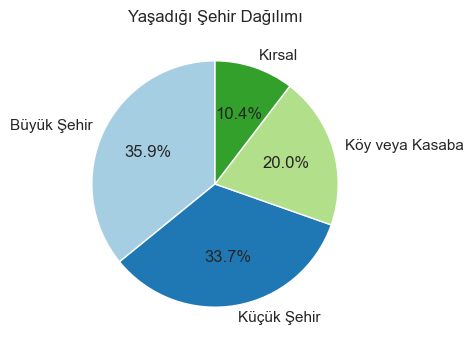

                                  En Çok İlgilendiği Ürün Grubu      Ratio
Giyim                                                      1487  27.234432
Ev ve Mobilya                                              1114  20.402930
Elektronik ve Teknolojik Ürünler                           1029  18.846154
Spor Malzemeleri                                           1001  18.333333
Kozmetik                                                    829  15.183150
##########################################


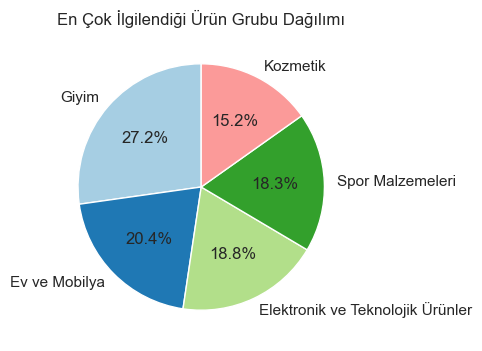

         Eğitime Devam Etme Durumu      Ratio
Etmiyor                       4554  83.406593
Ediyor                         906  16.593407
##########################################


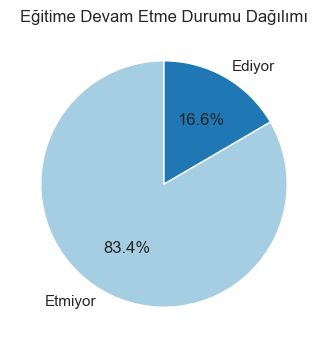

        Öbek İsmi      Ratio
obek_4        720  13.186813
obek_8        717  13.131868
obek_5        706  12.930403
obek_3        695  12.728938
obek_7        695  12.728938
obek_1        692  12.673993
obek_6        688  12.600733
obek_2        547  10.018315
##########################################


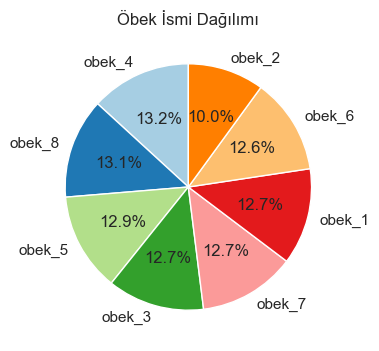

In [135]:
for col in cat_cols:
    cat_summary_pie(df, col)

### 1.7. Numeric Değişkenlerin incelenmesi

In [66]:
num_cols

['Yıllık Ortalama Gelir',
 'Yıllık Ortalama Satın Alım Miktarı',
 'Yıllık Ortalama Sipariş Verilen Ürün Adedi',
 'Yıllık Ortalama Sepete Atılan Ürün Adedi']

#### 1.7.1.Numeric değişkenlerin dağılımı

In [67]:
#numeric değişkenlerin dağılımı
def num_summary(dataframe, numerical_col, plot=True):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist()
        sns.set(rc={'figure.figsize': (6, 3)})
        plt.title(numerical_col)
        plt.show(block=True)

count    5.460000e+03
mean     3.635711e+05
std      2.197144e+05
min      4.392299e+04
5%       1.506287e+05
10%      1.705754e+05
20%      2.032899e+05
30%      2.274463e+05
40%      2.517758e+05
50%      2.869254e+05
60%      3.438221e+05
70%      3.727974e+05
80%      4.842462e+05
90%      7.590807e+05
95%      8.908845e+05
99%      1.035737e+06
max      1.192437e+06
Name: Yıllık Ortalama Gelir, dtype: float64


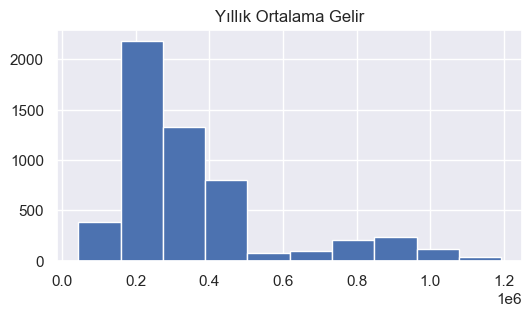

count     5460.000000
mean     16616.612217
std      14099.171704
min       2859.254000
5%        3750.944992
10%       3982.074933
20%       4480.098785
30%       5443.628646
40%       6530.204868
50%       8426.818967
60%       9649.438113
70%      27959.771488
80%      33290.270684
90%      38756.728396
95%      41256.719718
99%      44022.409246
max      48605.594415
Name: Yıllık Ortalama Satın Alım Miktarı, dtype: float64


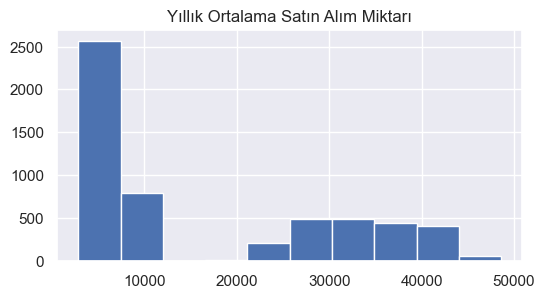

count    5460.000000
mean       24.040884
std        14.945655
min         0.000000
5%          4.012480
10%         7.169551
20%        10.321560
30%        14.277608
40%        16.356228
50%        20.095924
60%        26.176960
70%        31.195390
80%        39.760832
90%        46.698859
95%        51.775273
99%        57.663604
max        64.616196
Name: Yıllık Ortalama Sipariş Verilen Ürün Adedi, dtype: float64


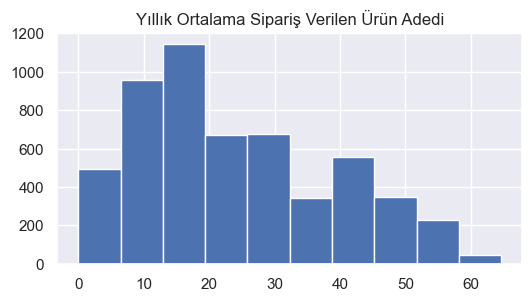

count    5460.000000
mean       73.445693
std        47.214184
min         3.977559
5%          9.478686
10%        11.471611
20%        20.334653
30%        43.406962
40%        51.719672
50%        82.485579
60%        94.814793
70%       101.236289
80%       108.553175
90%       129.625888
95%       159.470950
99%       192.469370
max       242.308441
Name: Yıllık Ortalama Sepete Atılan Ürün Adedi, dtype: float64


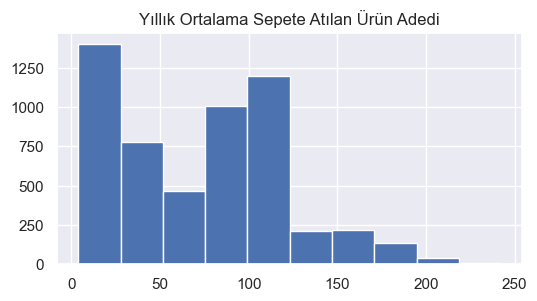

In [68]:
for col in num_cols:
    num_summary(df, col, plot=True)

### 1.8 Hedef Değişken Analizi

In [69]:
df["Öbek İsmi"].value_counts()

obek_4    720
obek_8    717
obek_5    706
obek_3    695
obek_7    695
obek_1    692
obek_6    688
obek_2    547
Name: Öbek İsmi, dtype: int64


#### 1.8.2. Hedef Değişkenin Numerik Değişkenler ile Analizi


In [105]:
def target_summary_with_num(dataframe, target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col: "mean"}), end="\n\n\n")

In [71]:
for col in num_cols:
    target_summary_with_num(df, "Öbek İsmi", col)



           Yıllık Ortalama Gelir
Öbek İsmi                       
obek_1             229513.847974
obek_2             172827.509911
obek_3             327899.094458
obek_4             817975.516312
obek_5             222224.036354
obek_6             480117.776102
obek_7             351949.976050
obek_8             255354.926670


           Yıllık Ortalama Satın Alım Miktarı
Öbek İsmi                                    
obek_1                            6047.195827
obek_2                            4996.038895
obek_3                            7360.697229
obek_4                           32405.008963
obek_5                            4542.305314
obek_6                           39440.273682
obek_7                           26429.293943
obek_8                            9277.243731


           Yıllık Ortalama Sipariş Verilen Ürün Adedi
Öbek İsmi                                            
obek_1                                       5.865500
obek_2                                      

### 1.9.1. Korelasyon analizi

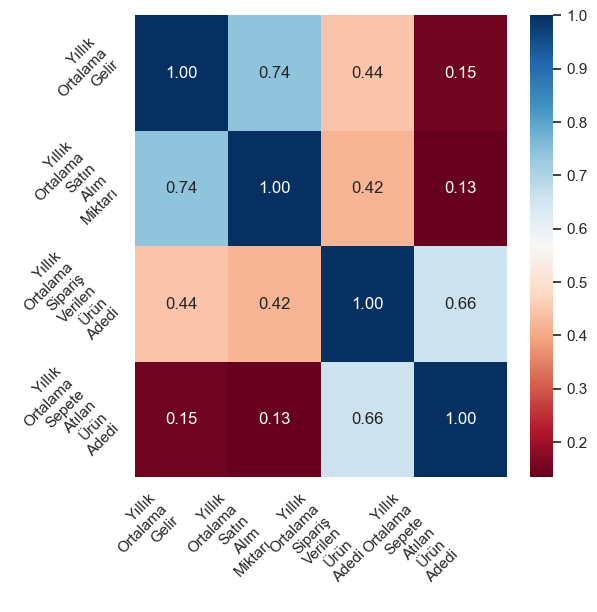

In [140]:
import seaborn as sns
import matplotlib.pyplot as plt

# Numerik kolonları seçme ve korelasyon matrisi oluşturma
num_cols = [col for col in df.columns if df[col].dtype in [int, float]]
corr = df[num_cols].corr()

# Değişken isimlerini her kelime alt alta olacak şekilde düzenleme
new_labels = ['\n'.join(col.split()) for col in num_cols]

# Isı haritası
sns.set(rc={'figure.figsize': (6, 6)})
ax = sns.heatmap(corr, cmap="RdBu", annot=True, fmt=".2f")

# X ve Y ekseninde değişken isimlerini güncelleme
ax.set_xticklabels(new_labels, rotation=45, ha="right")
ax.set_yticklabels(new_labels, rotation=45)

plt.show()

#### Korelasyon Değerlendirmesi:
Korelasyon grafiğini derinlemesine incelediğimizde, sayısal değişkenler arasındaki ilişkilerin dikkat çekici boyutlara ulaştığını fark ediyoruz. Özellikle yıllık ortalama gelir ile yıllık ortalama satın alım arasında %74 oranında güçlü bir korelasyon olduğu gözlemlenmiştir; bu durum, gelir arttıkça tüketim eğiliminin de aynı doğrultuda artış gösterdiğine işaret etmektedir. Aynı şekilde, yıllık ortalama sipariş edilen ürün adedi ile yıllık ortalama sepete eklenen ürün adedi arasında %66 oranında bir korelasyon bulunmuştur; bu da müşteri alışveriş alışkanlıklarının tutarlı bir şekilde sepet davranışlarına yansıdığını göstermektedir. Bu güçlü korelasyonlar, tüketici davranışlarının daha iyi anlaşılmasına yönelik stratejik çıkarımlar yapılmasına olanak tanımaktadır.

####  1.10.1. Korelasyon Analizi Matris Tablosu

In [73]:
#korelasyon matrisi tablosu
cor_matrix = df.corr().abs()
cor_matrix

,Yıllık Ortalama Gelir,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Yıllık Ortalama Sepete Atılan Ürün Adedi
Yıllık Ortalama Gelir,1.000000,0.740238,0.444398,0.145425
Yıllık Ortalama Satın Alım Miktarı,0.740238,1.000000,0.418499,0.133864
Yıllık Ortalama Sipariş Verilen Ürün Adedi,0.444398,0.418499,1.000000,0.659455
Yıllık Ortalama Sepete Atılan Ürün Adedi,0.145425,0.133864,0.659455,1.000000


#### 1.10.2. Korelasyon analizi matris tab 2

In [74]:
upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(bool))
upper_triangle_matrix

,Yıllık Ortalama Gelir,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Yıllık Ortalama Sepete Atılan Ürün Adedi
Yıllık Ortalama Gelir,NaN,0.740238,0.444398,0.145425
Yıllık Ortalama Satın Alım Miktarı,NaN,NaN,0.418499,0.133864
Yıllık Ortalama Sipariş Verilen Ürün Adedi,NaN,NaN,NaN,0.659455
Yıllık Ortalama Sepete Atılan Ürün Adedi,NaN,NaN,NaN,NaN


## 2. Bölüm

## 2. Feature Enginerring

### 2.1. Aykırı Değer Analizi

#### 2.1.1. Boxplot yöntemi(IQR Fonksiyonu tanımlama)

In [75]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

#### 2.1.2. IQR Alt ve Üst Limitlerini Belirleme

In [76]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False


#### 2.1.3. Aykırı Değeri Olan Değişkenler

In [77]:
for col in num_cols:
    print(col, check_outlier(df, col))

Yıllık Ortalama Gelir True
Yıllık Ortalama Satın Alım Miktarı False
Yıllık Ortalama Sipariş Verilen Ürün Adedi False
Yıllık Ortalama Sepete Atılan Ürün Adedi True


#### 2.1.4. Aykırı Değer Indexleri Fonk

In [78]:
def grab_outliers(dataframe, col_name, index=False):
    low, up = outlier_thresholds(dataframe, col_name)

    if dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].shape[0] > 10:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].head())
    else:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))])

    if index:
        outlier_index = dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].index
        return outlier_index

#### 2.1.5. Aykırı Değer Indexleri 

#### 2.1.6. Baskılama yöntemi ile aykırı değer problemini Çözme

In [79]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [80]:
for col in num_cols:
    replace_with_thresholds(df, col)

In [81]:
for col in num_cols:
    print(col, check_outlier(df, col))

Yıllık Ortalama Gelir False
Yıllık Ortalama Satın Alım Miktarı False
Yıllık Ortalama Sipariş Verilen Ürün Adedi False
Yıllık Ortalama Sepete Atılan Ürün Adedi False


### 2.2. Eksik Değerler(Missing Value)

In [82]:
df.isnull().values.any()

False

In [83]:
df.isnull().sum().sum()# eksik veri sayısı

0

### 2.3. Label Encoding

In [84]:
cat_cols.remove('Öbek İsmi')

In [85]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=True):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe


In [86]:
df=one_hot_encoder(df, cat_cols)

In [87]:
df

,Yıllık Ortalama Gelir,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Öbek İsmi,Yıllık Ortalama Sepete Atılan Ürün Adedi,Cinsiyet_Kadın,Yaş Grubu_31-40,Yaş Grubu_41-50,Yaş Grubu_51-60,Yaş Grubu_>60,...,İstihdam Durumu_Kendi İşinin Sahibi,İstihdam Durumu_İşsiz veya Düzenli Bir İşi Yok,Yaşadığı Şehir_Köy veya Kasaba,Yaşadığı Şehir_Küçük Şehir,Yaşadığı Şehir_Kırsal,En Çok İlgilendiği Ürün Grubu_Ev ve Mobilya,En Çok İlgilendiği Ürün Grubu_Giyim,En Çok İlgilendiği Ürün Grubu_Kozmetik,En Çok İlgilendiği Ürün Grubu_Spor Malzemeleri,Eğitime Devam Etme Durumu_Etmiyor
index,,,,,,,,,,,,,,,,,,,,,
0,748266.440879,32010.900881,37.310644,obek_4,102.936904,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,246298.609605,4145.729891,11.554851,obek_5,82.176053,0,0,0,0,1,...,1,0,0,1,0,0,0,0,1,1
2,268582.732360,9924.379414,55.353236,obek_8,141.661426,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,327721.837865,6417.780714,15.417239,obek_3,17.097397,0,0,0,1,0,...,1,0,0,0,1,0,1,0,0,1
4,397431.626948,7886.663061,14.689837,obek_3,20.470459,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5455,478054.247819,43182.299801,31.356284,obek_6,51.600436,1,0,0,0,1,...,0,0,1,0,0,0,0,1,0,1
5456,481852.853651,42107.996193,26.288620,obek_6,49.190536,0,0,0,1,0,...,1,0,1,0,0,1,0,0,0,1
5457,309443.687351,4655.392445,5.156906,obek_1,9.537384,1,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1


### 2.4. Özellik Ölçeklendirme(Scale)

In [88]:
y = df["Öbek İsmi"]
X = df.drop(["Öbek İsmi"], axis=1)

In [89]:
y.head()

index
0    obek_4
1    obek_5
2    obek_8
3    obek_3
4    obek_3
Name: Öbek İsmi, dtype: object

In [90]:
scaler= RobustScaler()
df[X.columns.to_list()]=scaler.fit_transform(df[X.columns.to_list()])

In [91]:
df.head()

,Yıllık Ortalama Gelir,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Öbek İsmi,Yıllık Ortalama Sepete Atılan Ürün Adedi,Cinsiyet_Kadın,Yaş Grubu_31-40,Yaş Grubu_41-50,Yaş Grubu_51-60,Yaş Grubu_>60,...,İstihdam Durumu_Kendi İşinin Sahibi,İstihdam Durumu_İşsiz veya Düzenli Bir İşi Yok,Yaşadığı Şehir_Köy veya Kasaba,Yaşadığı Şehir_Küçük Şehir,Yaşadığı Şehir_Kırsal,En Çok İlgilendiği Ürün Grubu_Ev ve Mobilya,En Çok İlgilendiği Ürün Grubu_Giyim,En Çok İlgilendiği Ürün Grubu_Kozmetik,En Çok İlgilendiği Ürün Grubu_Spor Malzemeleri,Eğitime Devam Etme Durumu_Etmiyor
index,,,,,,,,,,,,,,,,,,,,,
0,1.827131,0.919551,0.706458,obek_4,0.257366,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.160902,-0.166921,-0.350509,obek_5,-0.003895,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.072646,0.058390,1.446890,obek_8,0.744686,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-1.0
3,0.161573,-0.078333,-0.192004,obek_3,-0.822864,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.437657,-0.021061,-0.221855,obek_3,-0.780417,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## 3. BÖLÜM

## 3. MODELLERİN KURULUMU VE EĞİTİMİ

In [94]:
y = df["Öbek İsmi"]
X = df.drop(["Öbek İsmi"], axis=1)

### 3.1. Eğitim - Validation - Test olarak ayrılması

In [95]:
from sklearn.model_selection import train_test_split

# Veri setini train ve test setlerine ayırma
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=17)

# Kalan veri setini validation ve test setlerine ayırma
X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=17)


In [96]:
X_train

,Yıllık Ortalama Gelir,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Yıllık Ortalama Sepete Atılan Ürün Adedi,Cinsiyet_Kadın,Yaş Grubu_31-40,Yaş Grubu_41-50,Yaş Grubu_51-60,Yaş Grubu_>60,Medeni Durum_Evli,...,İstihdam Durumu_Kendi İşinin Sahibi,İstihdam Durumu_İşsiz veya Düzenli Bir İşi Yok,Yaşadığı Şehir_Köy veya Kasaba,Yaşadığı Şehir_Küçük Şehir,Yaşadığı Şehir_Kırsal,En Çok İlgilendiği Ürün Grubu_Ev ve Mobilya,En Çok İlgilendiği Ürün Grubu_Giyim,En Çok İlgilendiği Ürün Grubu_Kozmetik,En Çok İlgilendiği Ürün Grubu_Spor Malzemeleri,Eğitime Devam Etme Durumu_Etmiyor
index,,,,,,,,,,,,,,,,,,,,,
3510,0.428200,-0.049092,-0.184304,-0.807846,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4587,0.847475,1.289882,0.345207,-0.482190,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1701,-0.454776,-0.151448,0.335218,-0.529487,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4389,0.714073,1.206959,0.315615,-0.469394,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
819,-0.171118,-0.092637,-0.604443,-0.927966,0.0,0.0,1.0,0.0,0.0,-1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2800,-0.424566,-0.095582,-0.587928,-0.961023,1.0,0.0,0.0,0.0,0.0,-1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1337,0.487612,-0.039550,-0.196860,-0.797736,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
406,0.019690,0.030176,1.188858,0.857302,1.0,0.0,0.0,0.0,0.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0


In [97]:
X_train.head()

,Yıllık Ortalama Gelir,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Yıllık Ortalama Sepete Atılan Ürün Adedi,Cinsiyet_Kadın,Yaş Grubu_31-40,Yaş Grubu_41-50,Yaş Grubu_51-60,Yaş Grubu_>60,Medeni Durum_Evli,...,İstihdam Durumu_Kendi İşinin Sahibi,İstihdam Durumu_İşsiz veya Düzenli Bir İşi Yok,Yaşadığı Şehir_Köy veya Kasaba,Yaşadığı Şehir_Küçük Şehir,Yaşadığı Şehir_Kırsal,En Çok İlgilendiği Ürün Grubu_Ev ve Mobilya,En Çok İlgilendiği Ürün Grubu_Giyim,En Çok İlgilendiği Ürün Grubu_Kozmetik,En Çok İlgilendiği Ürün Grubu_Spor Malzemeleri,Eğitime Devam Etme Durumu_Etmiyor
index,,,,,,,,,,,,,,,,,,,,,
3510,0.428200,-0.049092,-0.184304,-0.807846,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4587,0.847475,1.289882,0.345207,-0.482190,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1701,-0.454776,-0.151448,0.335218,-0.529487,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4389,0.714073,1.206959,0.315615,-0.469394,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
819,-0.171118,-0.092637,-0.604443,-0.927966,0.0,0.0,1.0,0.0,0.0,-1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [98]:
X_train.count()

Yıllık Ortalama Gelir                             4368
Yıllık Ortalama Satın Alım Miktarı                4368
Yıllık Ortalama Sipariş Verilen Ürün Adedi        4368
Yıllık Ortalama Sepete Atılan Ürün Adedi          4368
Cinsiyet_Kadın                                    4368
Yaş Grubu_31-40                                   4368
Yaş Grubu_41-50                                   4368
Yaş Grubu_51-60                                   4368
Yaş Grubu_>60                                     4368
Medeni Durum_Evli                                 4368
Eğitim Düzeyi_Doktora Ötesi                       4368
Eğitim Düzeyi_Eğitimsiz                           4368
Eğitim Düzeyi_Lise Mezunu                         4368
Eğitim Düzeyi_Ortaokul Mezunu                     4368
Eğitim Düzeyi_Yüksek Lisans Mezunu                4368
Eğitim Düzeyi_Yüksekokul Mezunu                   4368
Eğitim Düzeyi_Üniversite Mezunu                   4368
Eğitim Düzeyi_İlkokul Mezunu                      4368
İstihdam D

In [99]:
X_test.count()

Yıllık Ortalama Gelir                             546
Yıllık Ortalama Satın Alım Miktarı                546
Yıllık Ortalama Sipariş Verilen Ürün Adedi        546
Yıllık Ortalama Sepete Atılan Ürün Adedi          546
Cinsiyet_Kadın                                    546
Yaş Grubu_31-40                                   546
Yaş Grubu_41-50                                   546
Yaş Grubu_51-60                                   546
Yaş Grubu_>60                                     546
Medeni Durum_Evli                                 546
Eğitim Düzeyi_Doktora Ötesi                       546
Eğitim Düzeyi_Eğitimsiz                           546
Eğitim Düzeyi_Lise Mezunu                         546
Eğitim Düzeyi_Ortaokul Mezunu                     546
Eğitim Düzeyi_Yüksek Lisans Mezunu                546
Eğitim Düzeyi_Yüksekokul Mezunu                   546
Eğitim Düzeyi_Üniversite Mezunu                   546
Eğitim Düzeyi_İlkokul Mezunu                      546
İstihdam Durumu_Emekli      

### 3.2. Base Modellerin kurulumu

In [100]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier, PassiveAggressiveClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.model_selection import cross_validate
import numpy as np

def base_models_classification(X_train, y_train, scoring="accuracy"):
    print("Base Models for Classification....")
    classifiers = [
        ('Logistic Regression', LogisticRegression(max_iter=10000)),
        ('Ridge Classifier', RidgeClassifier()),
        ('SGD Classifier', SGDClassifier(max_iter=10000)),
        ('Passive Aggressive Classifier', PassiveAggressiveClassifier(max_iter=1000)),
        ("SVC", SVC(max_iter=10000)),
        ("Linear SVC", LinearSVC(max_iter=10000)),
        ("Decision Tree", DecisionTreeClassifier()),
        ("Random Forest", RandomForestClassifier()),
        ('Adaboost Classifier', AdaBoostClassifier()),
        ('Gradient Boosting Classifier', GradientBoostingClassifier()),
        ('LightGBM Classifier', LGBMClassifier()),
        ('KNN Classifier', KNeighborsClassifier()),
        ('MLP Classifier', MLPClassifier(max_iter=1000)),
        ('Extra Trees Classifier', ExtraTreesClassifier()),
        ('Bagging Classifier', BaggingClassifier()),
        ('Extra Tree Classifier', ExtraTreeClassifier())
    ]

    best_models = []

    for name, classifier in classifiers:
        cv_results = cross_validate(classifier, X_train, y_train, cv=3, scoring=scoring)
        mean_score = cv_results['test_score'].mean()
        print(f"{scoring}: {round(np.abs(mean_score), 4)} ({name}) ")
        
        best_models.append((name, classifier, mean_score))
    
    # En iyi 3 modeli seçme
    best_models = sorted(best_models, key=lambda x: x[2], reverse=True)[:3]

    print("\nEn başarılı 3 model:")
    for rank, (name, _, score) in enumerate(best_models, start=1):
        print(f"{rank}. {name} ({scoring}={round(score, 4)})")


In [101]:
base_models_classification(X_train, y_train, scoring="accuracy")

Base Models for Classification....
accuracy: 0.9439 (Logistic Regression) 
accuracy: 0.9137 (Ridge Classifier) 
accuracy: 0.9405 (SGD Classifier) 
accuracy: 0.8576 (Passive Aggressive Classifier) 
accuracy: 0.9499 (SVC) 
accuracy: 0.9416 (Linear SVC) 
accuracy: 0.8963 (Decision Tree) 
accuracy: 0.9542 (Random Forest) 
accuracy: 0.8913 (Adaboost Classifier) 
accuracy: 0.9471 (Gradient Boosting Classifier) 
accuracy: 0.9526 (LightGBM Classifier) 
accuracy: 0.8949 (KNN Classifier) 
accuracy: 0.9158 (MLP Classifier) 
accuracy: 0.9517 (Extra Trees Classifier) 
accuracy: 0.9457 (Bagging Classifier) 
accuracy: 0.8638 (Extra Tree Classifier) 

En başarılı 3 model:
1. Random Forest (accuracy=0.9542)
2. LightGBM Classifier (accuracy=0.9526)
3. Extra Trees Classifier (accuracy=0.9517)


### 3.3. Hiperparametre Optimizasyonu

In [102]:
# Hiperparametre aralıkları
logreg_params = {"C": [0.1, 1.0, 10.0], "penalty": ["l2", "l1"]}
ridge_params = {"alpha": [0.1, 1.0, 10.0]}
sgd_params = {"alpha": [0.0001, 0.001, 0.01]}
passiveaggressive_params = {"C": [0.1, 1.0, 10.0]}
svc_params = {"C": [0.1, 1.0, 10.0], "kernel": ["linear", "rbf"]}
linear_svc_params = {"C": [0.1, 1.0, 10.0]}
decisiontree_params = {'max_depth': range(1, 20), "min_samples_split": range(2, 30)}
randomforest_params = {"max_depth": [8, 15, None], "max_features": [5, 7, "auto"], "min_samples_split": [15, 20], "n_estimators": [200, 300]}
adaboost_params = {"n_estimators": [50, 100, 200]}
gradientboost_params = {"learning_rate": [0.05, 0.1, 0.2], "n_estimators": [50, 100, 200], "max_depth": [3, 4, 5]}
xgboost_params = {"learning_rate": [0.1, 0.01], "max_depth": [5, 8], "n_estimators": [100, 200], "colsample_bytree": [0.5, 1]}
lightgbm_params = {"learning_rate": [0.01, 0.1], "n_estimators": [300, 500], "colsample_bytree": [0.7, 1]}
kneighbors_params = {"n_neighbors": [3, 5, 7], "weights": ["uniform", "distance"]}
mlp_params = {"hidden_layer_sizes": [(50,), (100,), (100, 50)], "alpha": [0.0001, 0.001], "max_iter": [1000]}

# Modelleri ve ilgili hiperparametre aralıklarını bir diziye ekleme
classifiers = [
    ("Logistic Regression", LogisticRegression(max_iter=10000), logreg_params),
    ("Ridge Classifier", RidgeClassifier(), ridge_params),
    ("SGD Classifier", SGDClassifier(max_iter=10000), sgd_params),
    ("Passive Aggressive Classifier", PassiveAggressiveClassifier(max_iter=1000), passiveaggressive_params),
    ("SVC", SVC(max_iter=10000), svc_params),
    ("Linear SVC", LinearSVC(max_iter=10000), linear_svc_params),
    ("Decision Tree", DecisionTreeClassifier(), decisiontree_params),
    ("Random Forest", RandomForestClassifier(), randomforest_params),
    ("AdaBoost Classifier", AdaBoostClassifier(), adaboost_params),
    ("Gradient Boosting Classifier", GradientBoostingClassifier(), gradientboost_params),
    ('LightGBM Classifier', LGBMClassifier(), lightgbm_params),
    ("KNN Classifier", KNeighborsClassifier(), kneighbors_params),
    ("MLP Classifier", MLPClassifier(), mlp_params),
    ("Extra Trees Classifier", ExtraTreesClassifier(), randomforest_params),
    ("Bagging Classifier", BaggingClassifier(), {"n_estimators": [10, 20, 30]}),
    ("Extra Tree Classifier", ExtraTreeClassifier(), decisiontree_params)
]

In [103]:
from sklearn.model_selection import GridSearchCV, cross_validate
import numpy as np

def hyperparameter_optimization(X, y, cv=3, scoring="accuracy"):
    print("Hyperparameter Optimization....")
    best_models = []
    
    for name, classifier, params in classifiers:
        print(f"########## {name} ##########")
        
        # İlk modelin cross validation sonucu
        cv_results_before = cross_validate(classifier, X, y, cv=cv, scoring=scoring)
        mean_score_before = cv_results_before['test_score'].mean()
        print(f"{scoring} (Before): {round(mean_score_before, 4)}")

        # Hiperparametre optimizasyonu
        gs_best = GridSearchCV(classifier, params, cv=cv, n_jobs=-1, verbose=False).fit(X, y)
        final_model = classifier.set_params(**gs_best.best_params_)

        # Optimize edilmiş modelin cross validation sonucu
        cv_results_after = cross_validate(final_model, X, y, cv=cv, scoring=scoring)
        mean_score_after = cv_results_after['test_score'].mean()
        print(f"{scoring} (After): {round(mean_score_after, 4)}")
        print(f"{name} best params: {gs_best.best_params_}\n")
        
        # Modeli best_models listesine ekle
        best_models.append((name, final_model, mean_score_after))
    
    # En iyi 3 modeli başarı sırasına göre seçme
    best_models = sorted(best_models, key=lambda x: x[2], reverse=True)[:3]

    # En başarılı 3 modeli yazdır
    print("\nEn başarılı 3 model:")
    for rank, (name, _, score) in enumerate(best_models, start=1):
        print(f"{rank}. {name} ({scoring}={round(score, 4)})")
    
    return {name: model for name, model, _ in best_models}

In [104]:
best_models=hyperparameter_optimization(X_train,y_train)

Hyperparameter Optimization....
########## Logistic Regression ##########
accuracy (Before): 0.9439
accuracy (After): 0.9444
Logistic Regression best params: {'C': 10.0, 'penalty': 'l2'}

########## Ridge Classifier ##########
accuracy (Before): 0.9137
accuracy (After): 0.9137
Ridge Classifier best params: {'alpha': 0.1}

########## SGD Classifier ##########
accuracy (Before): 0.9409
accuracy (After): 0.9416
SGD Classifier best params: {'alpha': 0.001}

########## Passive Aggressive Classifier ##########
accuracy (Before): 0.8897
accuracy (After): 0.9306
Passive Aggressive Classifier best params: {'C': 0.1}

########## SVC ##########
accuracy (Before): 0.9499
accuracy (After): 0.9505
SVC best params: {'C': 1.0, 'kernel': 'linear'}

########## Linear SVC ##########
accuracy (Before): 0.9416
accuracy (After): 0.9416
Linear SVC best params: {'C': 1.0}

########## Decision Tree ##########
accuracy (Before): 0.9029
accuracy (After): 0.9473
Decision Tree best params: {'max_depth': 6, 'min_sa

### 3.4. En iyi Modellerin Karmasından Oluşturulan Model

In [106]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score

def voting_classifier(best_models, X, y):
    print("Voting Classifier...")
    voting_clf = VotingClassifier(estimators=[
        ('Random Forest', best_models["Random Forest"]),
        ('Extra Trees Classifier', best_models["Extra Trees Classifier"]),
        ('LightGBM Classifier', best_models["LightGBM Classifier"])
    ], voting='soft', n_jobs=-1)
    
    voting_clf.fit(X, y)
    
    # Cross-validation sonuçları
    cv_results = cross_validate(voting_clf, X, y, cv=3, scoring="accuracy")
    
    accuracy_mean = cv_results['test_score'].mean()
    
    print(f"Accuracy: {accuracy_mean}")
    
    return voting_clf


In [107]:
best_models

{'Random Forest': RandomForestClassifier(max_depth=8, max_features=5, min_samples_split=15,
                        n_estimators=200),
 'LightGBM Classifier': LGBMClassifier(colsample_bytree=0.7, learning_rate=0.01, n_estimators=500),
 'Extra Trees Classifier': ExtraTreesClassifier(max_depth=15, max_features=5, min_samples_split=20,
                      n_estimators=300)}

In [108]:
voting_clf=voting_classifier(best_models,X_train,y_train)

Voting Classifier...
Accuracy: 0.9542124542124543


### 3.5. En Başarılı Modelde Hata Oranı

In [109]:
train_pred=voting_clf.predict(X_train)
val_pred=voting_clf.predict(X_validation)
test_pred=voting_clf.predict(X_test)

In [110]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def calculate_metrics_for_custom_splits(y_true_train, y_pred_train, y_true_val, y_pred_val, y_true_test, y_pred_test):
    """
    Verilen gerçek ve tahmin edilen değerler için Accuracy, Precision, Recall ve F1-Score hesaplar.

    Parameters:
    - y_true_train: Eğitim setindeki gerçek değerler
    - y_pred_train: Eğitim setindeki tahmin edilen değerler
    - y_true_val: Doğrulama setindeki gerçek değerler
    - y_pred_val: Doğrulama setindeki tahmin edilen değerler
    - y_true_test: Test setindeki gerçek değerler
    - y_pred_test: Test setindeki tahmin edilen değerler

    Returns:
    - train_accuracy: Eğitim seti Accuracy
    - val_accuracy: Doğrulama seti Accuracy
    - test_accuracy: Test seti Accuracy
    - train_precision: Eğitim seti Precision
    - val_precision: Doğrulama seti Precision
    - test_precision: Test seti Precision
    - train_recall: Eğitim seti Recall
    - val_recall: Doğrulama seti Recall
    - test_recall: Test seti Recall
    - train_f1: Eğitim seti F1-Score
    - val_f1: Doğrulama seti F1-Score
    - test_f1: Test seti F1-Score
    """

    # Eğitim setinde Accuracy, Precision, Recall ve F1-Score hesapla
    train_accuracy = accuracy_score(y_true_train, y_pred_train)
    train_precision = precision_score(y_true_train, y_pred_train, average='weighted')
    train_recall = recall_score(y_true_train, y_pred_train, average='weighted')
    train_f1 = f1_score(y_true_train, y_pred_train, average='weighted')

    # Doğrulama setinde Accuracy, Precision, Recall ve F1-Score hesapla
    val_accuracy = accuracy_score(y_true_val, y_pred_val)
    val_precision = precision_score(y_true_val, y_pred_val, average='weighted')
    val_recall = recall_score(y_true_val, y_pred_val, average='weighted')
    val_f1 = f1_score(y_true_val, y_pred_val, average='weighted')

    # Test setinde Accuracy, Precision, Recall ve F1-Score hesapla
    test_accuracy = accuracy_score(y_true_test, y_pred_test)
    test_precision = precision_score(y_true_test, y_pred_test, average='weighted')
    test_recall = recall_score(y_true_test, y_pred_test, average='weighted')
    test_f1 = f1_score(y_true_test, y_pred_test, average='weighted')

    print(f"Train Accuracy: {train_accuracy}")
    print(f"Train Precision: {train_precision}")
    print(f"Train Recall: {train_recall}")
    print(f"Train F1-Score: {train_f1}")
    print(f"Validation Accuracy: {val_accuracy}")
    print(f"Validation Precision: {val_precision}")
    print(f"Validation Recall: {val_recall}")
    print(f"Validation F1-Score: {val_f1}")
    print(f"Test Accuracy: {test_accuracy}")
    print(f"Test Precision: {test_precision}")
    print(f"Test Recall: {test_recall}")
    print(f"Test F1-Score: {test_f1}")
    
    return (train_accuracy, val_accuracy, test_accuracy,
            train_precision, val_precision, test_precision,
            train_recall, val_recall, test_recall,
            train_f1, val_f1, test_f1)


In [111]:
calculate_metrics_for_custom_splits(y_train, train_pred,y_validation, val_pred, y_test, test_pred)

Train Accuracy: 0.9555860805860806
Train Precision: 0.9557584921140176
Train Recall: 0.9555860805860806
Train F1-Score: 0.9555888019541486
Validation Accuracy: 0.9633699633699634
Validation Precision: 0.9640095816566404
Validation Recall: 0.9633699633699634
Validation F1-Score: 0.9634617636013982
Test Accuracy: 0.9487179487179487
Test Precision: 0.9489633291828264
Test Recall: 0.9487179487179487
Test F1-Score: 0.9487075494536877


(0.9555860805860806,
 0.9633699633699634,
 0.9487179487179487,
 0.9557584921140176,
 0.9640095816566404,
 0.9489633291828264,
 0.9555860805860806,
 0.9633699633699634,
 0.9487179487179487,
 0.9555888019541486,
 0.9634617636013982,
 0.9487075494536877)

### 3.6. Model Kayıt

In [112]:
joblib.dump(voting_clf, "voting_clf.pkl")

['voting_clf.pkl']

### 3.7. Model Çağırma

In [113]:
random_user = X.sample(1, random_state=45)
new_model = joblib.load("voting_clf2.pkl")
new_model.predict(random_user)


array(['obek_1'], dtype=object)

### 3.8. Gerçek değerler ile Tahmini Değerler

In [114]:
test_pred_series = pd.Series(test_pred, name="tahmin")

# y_test ve test_pred verilerini bir DataFrame'de birleştirin
karsilastirma = pd.concat([y_test.reset_index(drop=True), test_pred_series.reset_index(drop=True)], axis=1)

# DataFrame'i gösterin
print(karsilastirma)

    Öbek İsmi  tahmin
0      obek_7  obek_7
1      obek_2  obek_2
2      obek_4  obek_4
3      obek_4  obek_4
4      obek_6  obek_6
..        ...     ...
541    obek_4  obek_4
542    obek_5  obek_5
543    obek_8  obek_8
544    obek_8  obek_8
545    obek_1  obek_1

[546 rows x 2 columns]


In [115]:
test_pred_series = pd.Series(test_pred, index=y_test.index[:len(test_pred)], name="tahmin")

# y_test ve test_pred verilerini bir DataFrame'de birleştirin
karsilastirma = pd.DataFrame({"gercek_obek": y_test, "tahmin": test_pred_series})

# DataFrame'i gösterin
print(karsilastirma)

      gercek_obek  tahmin
index                    
5125       obek_7  obek_7
1756       obek_2  obek_2
1476       obek_4  obek_4
4648       obek_4  obek_4
3853       obek_6  obek_6
...           ...     ...
5442       obek_4  obek_4
1902       obek_5  obek_5
400        obek_8  obek_8
4047       obek_8  obek_8
3315       obek_1  obek_1

[546 rows x 2 columns]


In [116]:
karsilastirma

,gercek_obek,tahmin
index,,
5125,obek_7,obek_7
1756,obek_2,obek_2
1476,obek_4,obek_4
4648,obek_4,obek_4
3853,obek_6,obek_6
...,...,...
5442,obek_4,obek_4
1902,obek_5,obek_5
400,obek_8,obek_8
